**Load And Preprocess The Data**

In [1]:
%cd /content/drive/MyDrive/data
!ls

/content/drive/MyDrive/data
clickposts_data.csv  final_df.csv  reorders_data.csv


In [2]:
import pandas as pd

#read data
clickpost = pd.read_csv("clickposts_data.csv")
reorders = pd.read_csv("reorders_data.csv")
#drop null column
clickpost = clickpost.drop(columns=['Unnamed: 0']).reset_index()
reorders = reorders.drop(columns=['Unnamed: 0']).reset_index()


print(clickpost.shape)
print(reorders.shape)

(743125, 4)
(10909, 6)


In [3]:
clickpost.columns

Index(['index', 'post_id', 'click_time', 'click_post_count'], dtype='object')

In [4]:
clickpost.head(5)

,index,post_id,click_time,click_post_count
0,0,gXvC9ucx,5/7/2020 0:00,31
1,1,gXluVlHC,5/7/2020 0:00,19
2,2,gXxugqam,5/7/2020 0:00,13
3,3,gXy6Jn2Y,5/7/2020 0:00,14
4,4,gXo2A5D9,5/7/2020 0:00,38


In [5]:
reorders.columns

Index(['index', 'post_id', 'tag', 'reorder_time', 'post_publish_time',
       'post_retire_time'],
      dtype='object')

In [6]:
reorders.head(5)

,index,post_id,tag,reorder_time,post_publish_time,post_retire_time
0,0,gX1-5MmB,reorder,5/9/2020 10:00,5/8/2020 22:44,5/11/2020 14:12
1,1,gX1-WPeh,urgent-reorder,5/9/2020 20:39,5/8/2020 19:14,5/13/2020 19:07
2,2,gX1eSoEn,reorder,5/9/2020 12:48,5/8/2020 14:14,5/9/2020 12:52
3,3,gXkaGKA_,reorder,5/3/2020 13:24,4/25/2020 21:07,5/10/2020 12:35
4,4,gXkaGKA_,reorder,5/2/2020 11:08,4/25/2020 21:07,5/10/2020 12:35


In [7]:
df = pd.merge(clickpost, reorders, on='post_id',  how='outer')
df.head(25)

,index_x,post_id,click_time,click_post_count,index_y,tag,reorder_time,post_publish_time,post_retire_time
0,0,gXvC9ucx,5/7/2020 0:00,31,3101,urgent-reorder,5/5/2020 12:30,5/4/2020 12:53,5/7/2020 0:56
1,31236,gXvC9ucx,5/5/2020 4:00,5,3101,urgent-reorder,5/5/2020 12:30,5/4/2020 12:53,5/7/2020 0:56
2,37532,gXvC9ucx,5/5/2020 15:00,36,3101,urgent-reorder,5/5/2020 12:30,5/4/2020 12:53,5/7/2020 0:56
3,38177,gXvC9ucx,5/4/2020 18:00,25,3101,urgent-reorder,5/5/2020 12:30,5/4/2020 12:53,5/7/2020 0:56
4,64615,gXvC9ucx,5/4/2020 14:00,61,3101,urgent-reorder,5/5/2020 12:30,5/4/2020 12:53,5/7/2020 0:56
5,65263,gXvC9ucx,5/5/2020 5:00,3,3101,urgent-reorder,5/5/2020 12:30,5/4/2020 12:53,5/7/2020 0:56
6,95385,gXvC9ucx,5/6/2020 13:00,19,3101,urgent-reorder,5/5/2020 12:30,5/4/2020 12:53,5/7/2020 0:56
7,97671,gXvC9ucx,5/6/2020 11:00,18,3101,urgent-reorder,5/5/2020 12:30,5/4/2020 12:53,5/7/2020 0:56
8,104062,gXvC9ucx,5/5/2020 21:00,47,3101,urgent-reorder,5/5/2020 12:30,5/4/2020 12:53,5/7/2020 0:56
9,119146,gXvC9ucx,5/4/2020 21:00,38,3101,urgent-reorder,5/5/2020 12:30,5/4/2020 12:53,5/7/2020 0:56


In [8]:
print(df.shape)

(1244674, 9)


In [9]:
final_df = df.drop_duplicates(subset='post_id')

In [10]:
print(final_df.shape)

(7325, 9)


In [11]:
final_df.head()

,index_x,post_id,click_time,click_post_count,index_y,tag,reorder_time,post_publish_time,post_retire_time
0,0,gXvC9ucx,5/7/2020 0:00,31,3101,urgent-reorder,5/5/2020 12:30,5/4/2020 12:53,5/7/2020 0:56
64,1,gXluVlHC,5/7/2020 0:00,19,7293,urgent-reorder,5/5/2020 2:37,4/26/2020 14:35,5/13/2020 0:10
294,2,gXxugqam,5/7/2020 0:00,13,5399,reorder,5/8/2020 12:41,5/5/2020 11:18,5/11/2020 12:52
411,3,gXy6Jn2Y,5/7/2020 0:00,14,1133,reorder,5/7/2020 13:43,5/6/2020 16:06,5/8/2020 23:17
468,4,gXo2A5D9,5/7/2020 0:00,38,4150,reorder,5/1/2020 5:09,4/28/2020 15:37,5/9/2020 17:23


In [12]:
# get the unique post ids first 
# then enumerate them and update click_pose_count from the original df with duplitcate ids per click

import numpy as np


unique_id_list = np.unique(final_df['post_id'])
for id in unique_id_list[0:10]:
  print(id)

gX0-BX2i
gX0-Cbgo
gX0-HGIO
gX0-PDkv
gX0-RNuk
gX0-V3dD
gX0-gWtn
gX0-iDWS
gX0-jtbn
gX0-k1go


In [13]:
# for each ID

for id in unique_id_list:
  id_df = df[df['post_id']==id]
  total_clicks = np.sum(id_df['click_post_count'])
  # get the total number of clicks
  # and replace it in the new df
  final_df.loc[final_df['post_id']==id, 'click_post_count'] = total_clicks

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [14]:
# remove the duplicate columns created
final_df.columns

Index(['index_x', 'post_id', 'click_time', 'click_post_count', 'index_y',
       'tag', 'reorder_time', 'post_publish_time', 'post_retire_time'],
      dtype='object')

In [15]:
final_df = final_df.drop(columns=['index_x', 'index_y'])

In [16]:
final_df = final_df.reset_index()

In [17]:
final_df.tail(5)

,index,post_id,click_time,click_post_count,tag,reorder_time,post_publish_time,post_retire_time
7320,1244618,gXzC9prE,5/7/2020 18:00,838,reorder,5/7/2020 16:05,5/7/2020 13:48,5/7/2020 16:28
7321,1244627,gXlypm15,5/3/2020 13:00,14,reorder,5/7/2020 10:20,4/26/2020 19:10,NaN
7322,1244639,gXkWywKl,5/1/2020 16:00,985,reorder,5/1/2020 8:24,4/25/2020 16:38,5/1/2020 11:32
7323,1244654,gXsmfEBU,5/2/2020 13:00,325,reorder,5/2/2020 11:53,5/2/2020 9:16,5/2/2020 14:28
7324,1244661,gXlWeLPP,5/3/2020 17:00,232,urgent-reorder,5/3/2020 14:30,4/27/2020 0:26,5/3/2020 22:25


In [18]:
clean_data = final_df[['click_post_count', 'tag']]
clean_data.head(5)

,click_post_count,tag
0,2031,urgent-reorder
1,3265,urgent-reorder
2,1977,reorder
3,783,reorder
4,11222,reorder


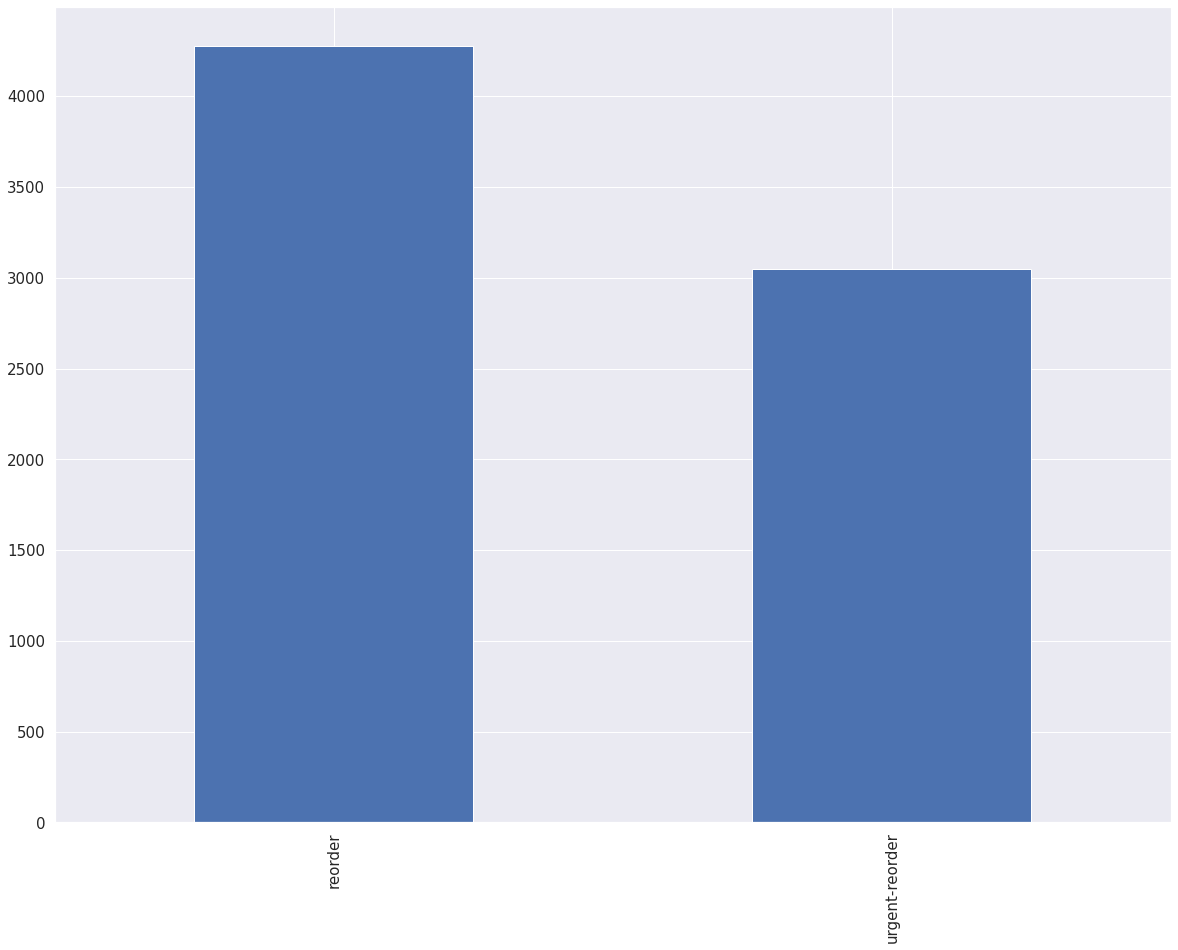

In [20]:
# how many orders and how many urgent reorders.
import seaborn as sns

sns.set(rc={'figure.figsize':(20,15)})
clean_data['tag'].value_counts().plot(kind='bar',fontsize=15)

In [21]:
# remove outliers so that plots are nicer

clean_data = clean_data[clean_data.click_post_count < clean_data.click_post_count.quantile(.85)]

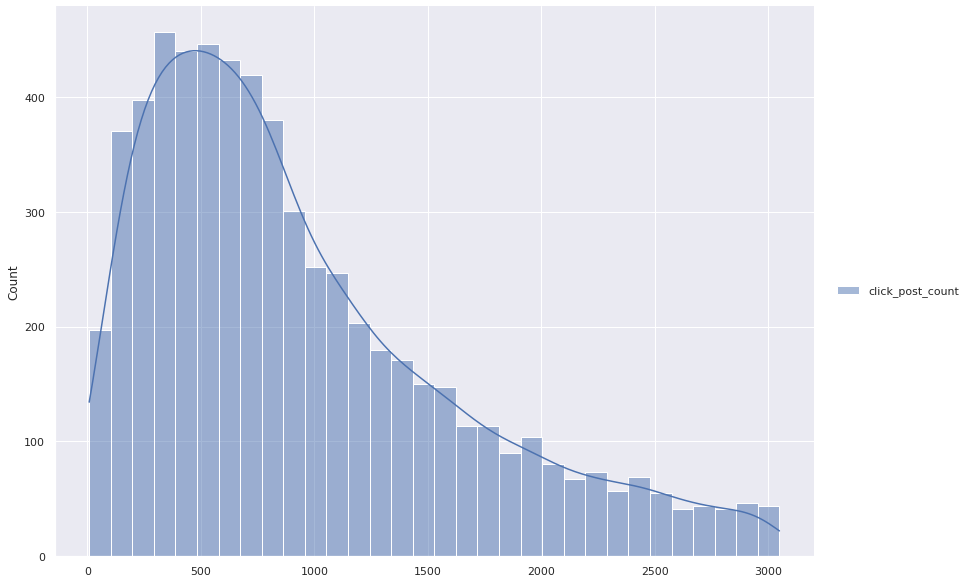

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.displot(clean_data, kde=True, height=8.27, aspect=11.7/8.27)


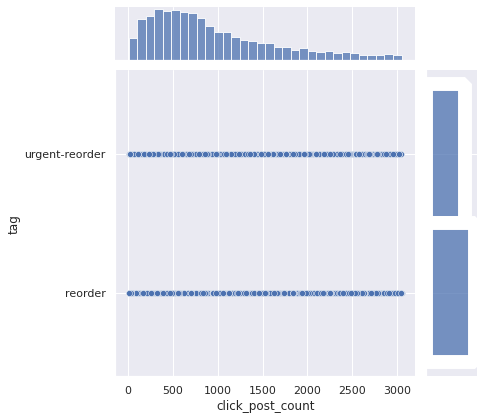

In [23]:
sns.jointplot(x='click_post_count', y='tag', data=clean_data)

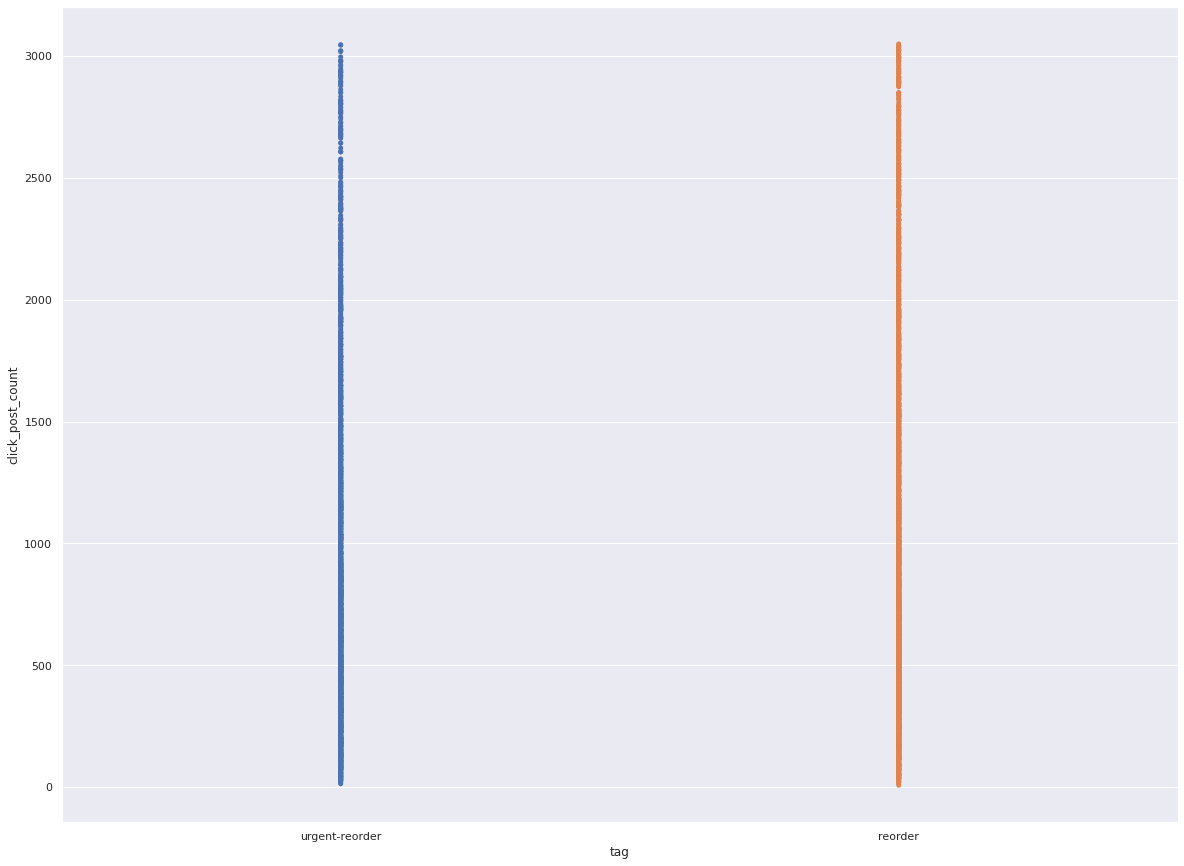

In [24]:
sns.stripplot(x="tag", y="click_post_count", data=clean_data, jitter=False)

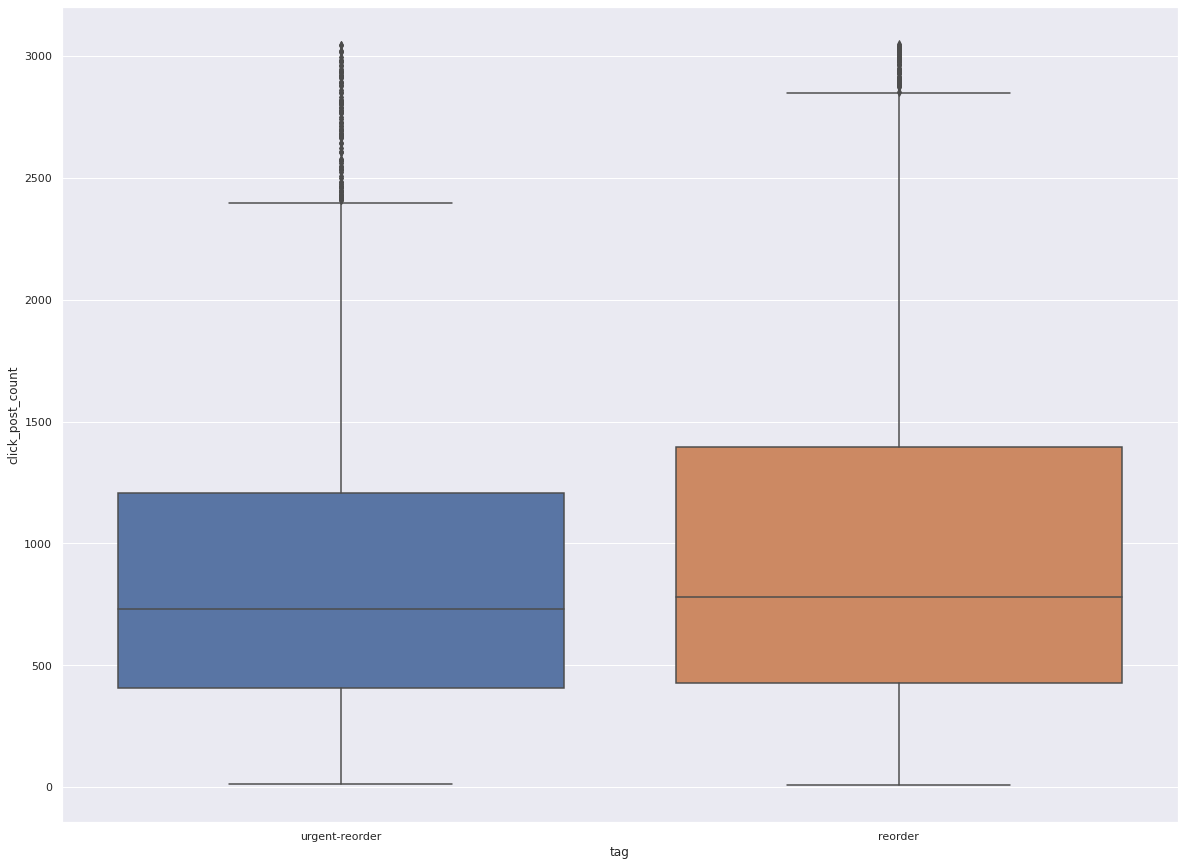

In [25]:
sns.boxplot(x="tag", y="click_post_count", data=clean_data)

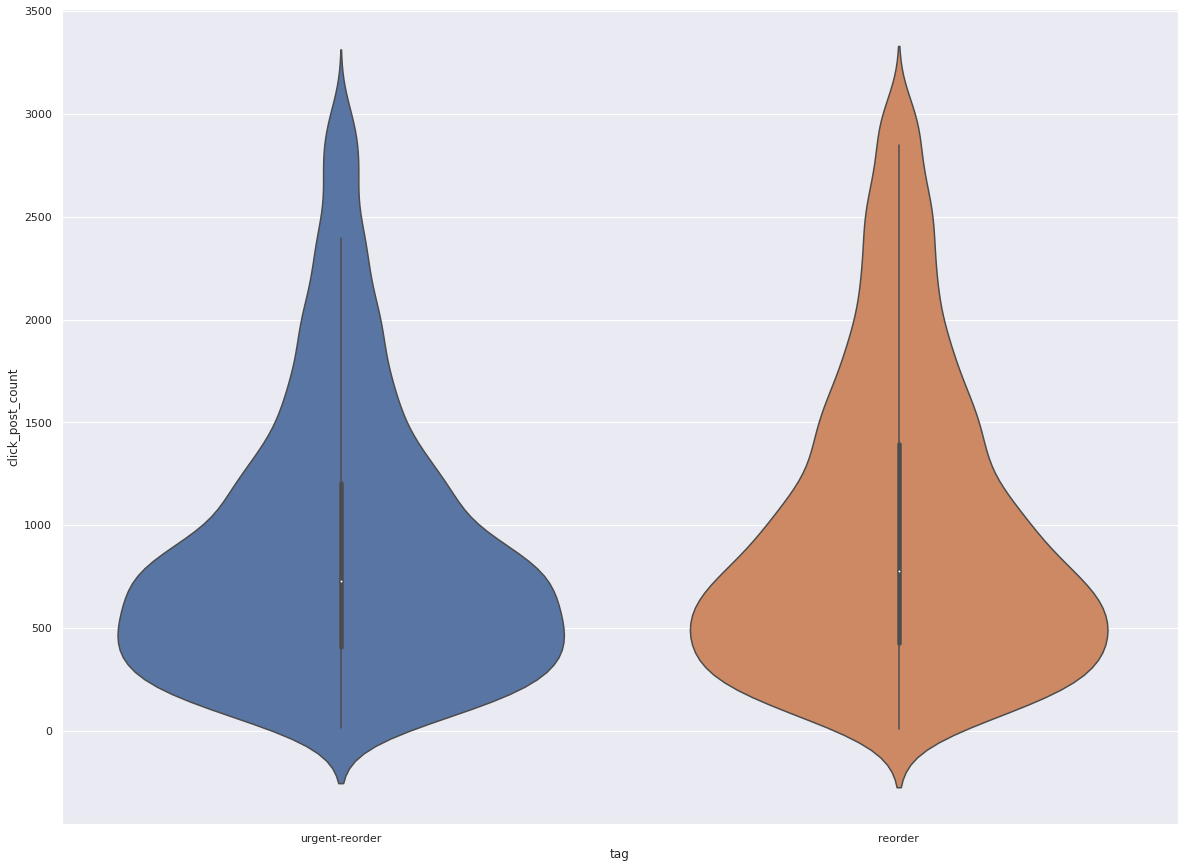

In [26]:
sns.violinplot(x="tag", y="click_post_count", data=clean_data)

In [27]:
urgent_reorder_data = clean_data[clean_data['tag']=='urgent-reorder']['click_post_count']
reorder_data = clean_data[clean_data['tag']=='reorder']['click_post_count']

In [28]:
# get the datas as seperate entities to do a ttest

urgent_reorder_data.shape, reorder_data.shape

((2772,), (3453,))

In [29]:
from scipy.stats import ttest_ind

output = ttest_ind(urgent_reorder_data, reorder_data)
output

Ttest_indResult(statistic=-5.281280645883837, pvalue=1.3263643885123312e-07)

In [30]:
np.mean(urgent_reorder_data)

891.8347763347763

In [31]:
np.mean(reorder_data)

984.7874312192297

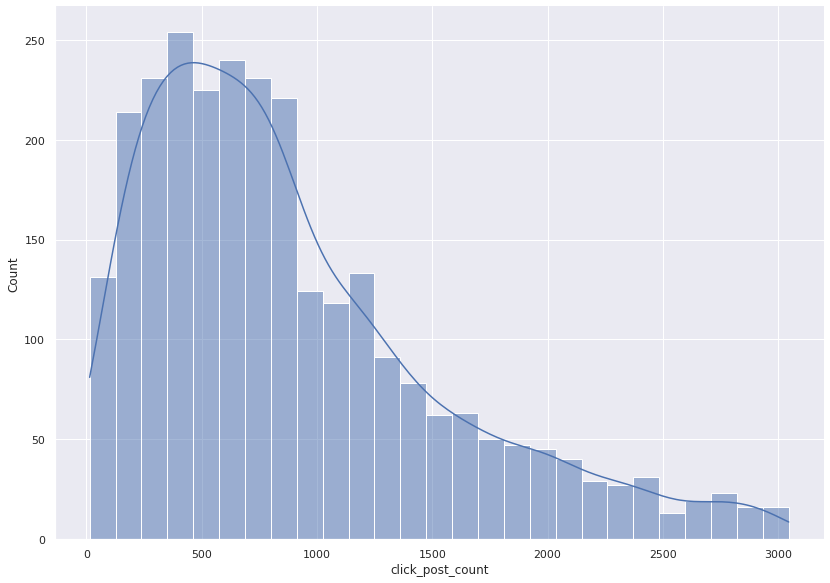

In [32]:
sns.displot(urgent_reorder_data, kde=True, height=8.27, aspect=11.7/8.27)

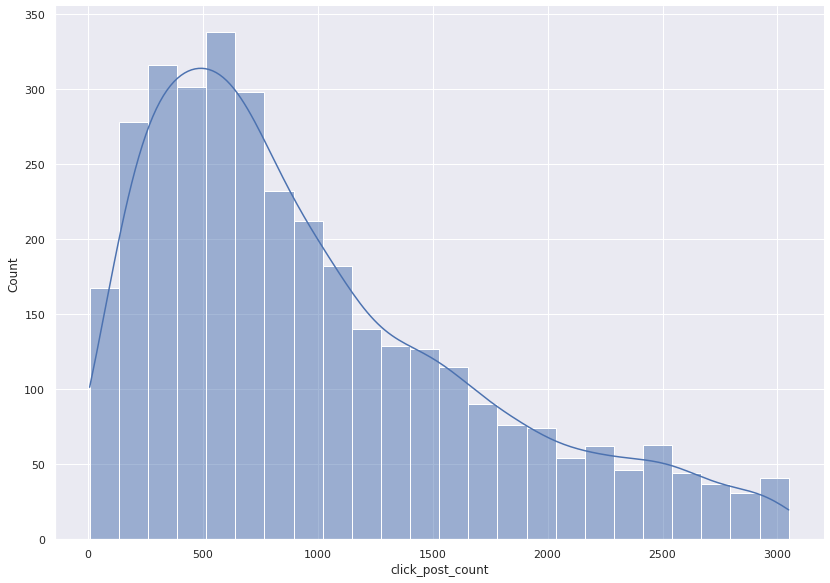

In [33]:
sns.displot(reorder_data, kde=True, height=8.27, aspect=11.7/8.27)

In [ ]:
# the reorder data has a significant increase in mean.
# the end.

**Date and Time**

In [34]:
import pandas as pd
df = final_df
df[["reorder_time", "post_publish_time", "post_retire_time"]] = df[["reorder_time", "post_publish_time", "post_retire_time"]].apply(pd.to_datetime)
df

,index,post_id,click_time,click_post_count,tag,reorder_time,post_publish_time,post_retire_time
0,0,gXvC9ucx,5/7/2020 0:00,2031,urgent-reorder,2020-05-05 12:30:00,2020-05-04 12:53:00,2020-05-07 00:56:00
1,64,gXluVlHC,5/7/2020 0:00,3265,urgent-reorder,2020-05-05 02:37:00,2020-04-26 14:35:00,2020-05-13 00:10:00
2,294,gXxugqam,5/7/2020 0:00,1977,reorder,2020-05-08 12:41:00,2020-05-05 11:18:00,2020-05-11 12:52:00
3,411,gXy6Jn2Y,5/7/2020 0:00,783,reorder,2020-05-07 13:43:00,2020-05-06 16:06:00,2020-05-08 23:17:00
4,468,gXo2A5D9,5/7/2020 0:00,11222,reorder,2020-05-01 05:09:00,2020-04-28 15:37:00,2020-05-09 17:23:00
...,...,...,...,...,...,...,...,...
7320,1244618,gXzC9prE,5/7/2020 18:00,838,reorder,2020-05-07 16:05:00,2020-05-07 13:48:00,2020-05-07 16:28:00
7321,1244627,gXlypm15,5/3/2020 13:00,14,reorder,2020-05-07 10:20:00,2020-04-26 19:10:00,NaT
7322,1244639,gXkWywKl,5/1/2020 16:00,985,reorder,2020-05-01 08:24:00,2020-04-25 16:38:00,2020-05-01 11:32:00
7323,1244654,gXsmfEBU,5/2/2020 13:00,325,reorder,2020-05-02 11:53:00,2020-05-02 09:16:00,2020-05-02 14:28:00


In [35]:
df.describe()

,index,click_post_count
count,7.325000e+03,7325.000000
mean,7.516626e+05,2339.213788
std,3.725942e+05,8616.128160
min,0.000000e+00,8.000000
25%,4.523750e+05,477.000000
50%,8.081220e+05,899.000000
75%,1.096511e+06,1896.000000
max,1.244661e+06,470862.000000


**Total Duration**

In [36]:
df['Day'] = df['post_publish_time'].dt.day
# month
df['Month'] = df['post_publish_time'].dt.month
# year
df['Year'] = df['post_publish_time'].dt.year
# hour
df['Start_hour'] = df['post_publish_time'].dt.hour
# minute
df['Start_minute'] = df['post_publish_time'].dt.minute
# second
df['Start_second'] = df['post_publish_time'].dt.second
# Monday is 0 and Sunday is 6
df['Start_weekday'] = df['post_publish_time'].dt.weekday
# week of the year
df['Start_week_of_year'] = df['post_publish_time'].dt.week
# duration
df['Duration'] = df['post_retire_time']-df['post_publish_time']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app


In [37]:
from datetime import timedelta

df['Duration_days'] = df['Duration']/timedelta(days=1)
df['Duration_minutes'] = df['Duration']/timedelta(minutes=1)
df['Duration_seconds'] = df['Duration']/timedelta(seconds=1)
df

,index,post_id,click_time,click_post_count,tag,reorder_time,post_publish_time,post_retire_time,Day,Month,Year,Start_hour,Start_minute,Start_second,Start_weekday,Start_week_of_year,Duration,Duration_days,Duration_minutes,Duration_seconds
0,0,gXvC9ucx,5/7/2020 0:00,2031,urgent-reorder,2020-05-05 12:30:00,2020-05-04 12:53:00,2020-05-07 00:56:00,4,5,2020,12,53,0,0,19,2 days 12:03:00,2.502083,3603.0,216180.0
1,64,gXluVlHC,5/7/2020 0:00,3265,urgent-reorder,2020-05-05 02:37:00,2020-04-26 14:35:00,2020-05-13 00:10:00,26,4,2020,14,35,0,6,17,16 days 09:35:00,16.399306,23615.0,1416900.0
2,294,gXxugqam,5/7/2020 0:00,1977,reorder,2020-05-08 12:41:00,2020-05-05 11:18:00,2020-05-11 12:52:00,5,5,2020,11,18,0,1,19,6 days 01:34:00,6.065278,8734.0,524040.0
3,411,gXy6Jn2Y,5/7/2020 0:00,783,reorder,2020-05-07 13:43:00,2020-05-06 16:06:00,2020-05-08 23:17:00,6,5,2020,16,6,0,2,19,2 days 07:11:00,2.299306,3311.0,198660.0
4,468,gXo2A5D9,5/7/2020 0:00,11222,reorder,2020-05-01 05:09:00,2020-04-28 15:37:00,2020-05-09 17:23:00,28,4,2020,15,37,0,1,18,11 days 01:46:00,11.073611,15946.0,956760.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7320,1244618,gXzC9prE,5/7/2020 18:00,838,reorder,2020-05-07 16:05:00,2020-05-07 13:48:00,2020-05-07 16:28:00,7,5,2020,13,48,0,3,19,0 days 02:40:00,0.111111,160.0,9600.0
7321,1244627,gXlypm15,5/3/2020 13:00,14,reorder,2020-05-07 10:20:00,2020-04-26 19:10:00,NaT,26,4,2020,19,10,0,6,17,NaT,NaN,NaN,NaN
7322,1244639,gXkWywKl,5/1/2020 16:00,985,reorder,2020-05-01 08:24:00,2020-04-25 16:38:00,2020-05-01 11:32:00,25,4,2020,16,38,0,5,17,5 days 18:54:00,5.787500,8334.0,500040.0
7323,1244654,gXsmfEBU,5/2/2020 13:00,325,reorder,2020-05-02 11:53:00,2020-05-02 09:16:00,2020-05-02 14:28:00,2,5,2020,9,16,0,5,18,0 days 05:12:00,0.216667,312.0,18720.0


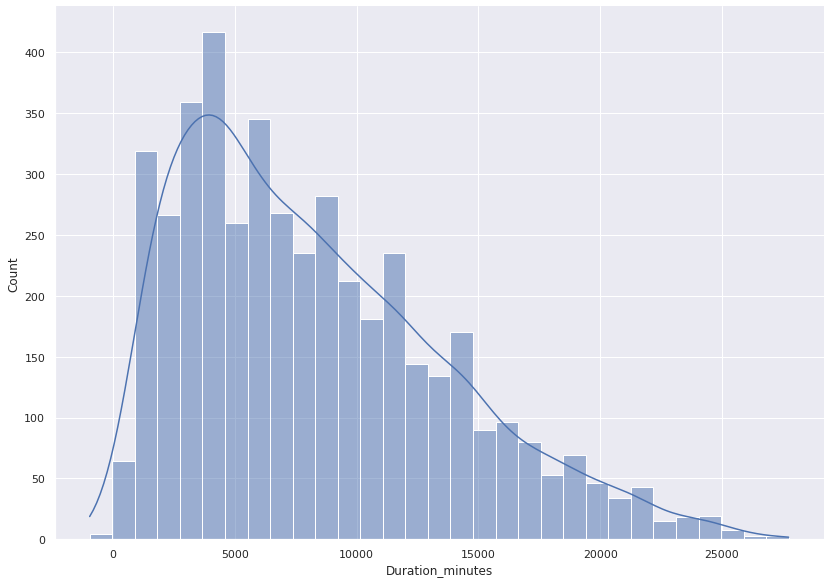

In [38]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,15)})
sns.displot(df['Duration_minutes'], kde=True,  height=8.27, aspect=11.7/8.27)

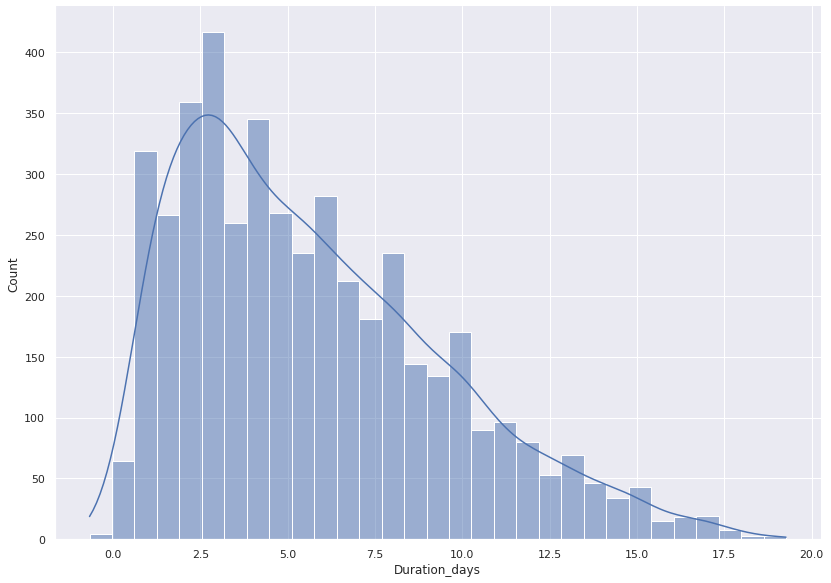

In [39]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.displot(df['Duration_days'], kde=True,  height=8.27, aspect=11.7/8.27)

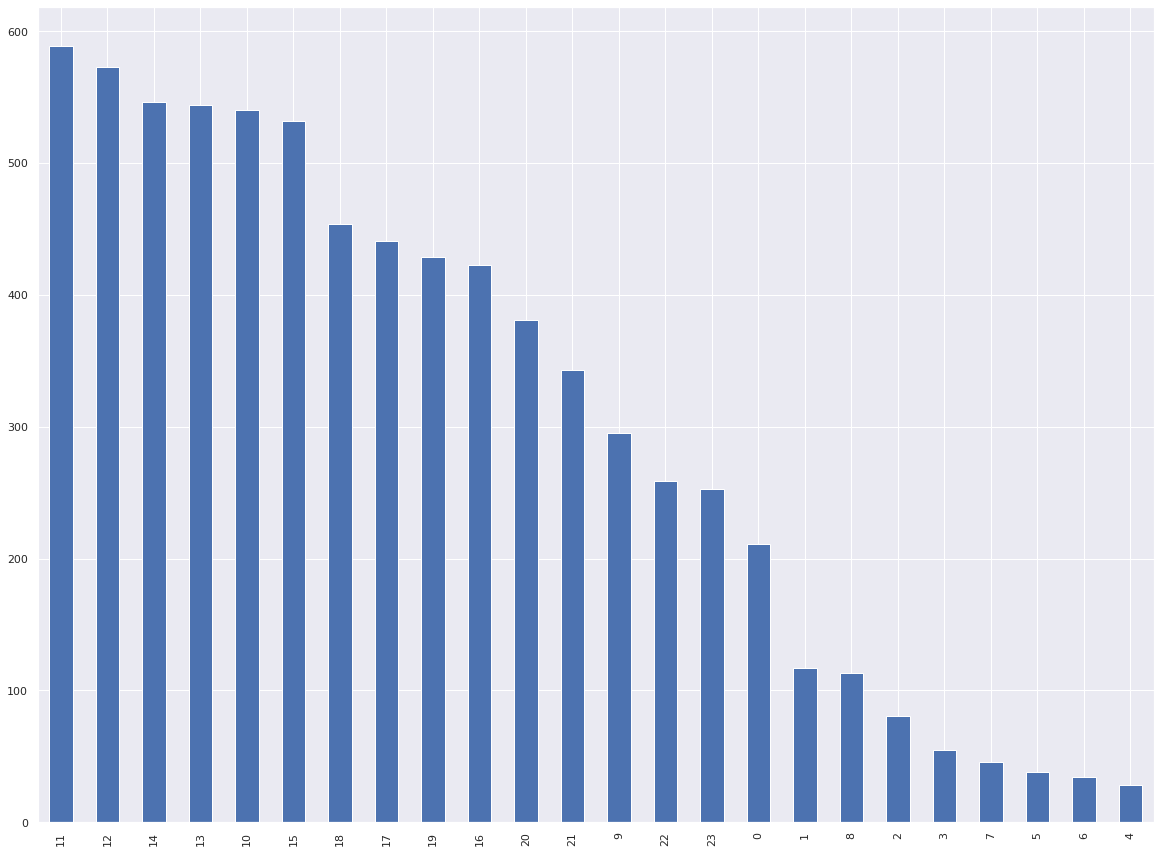

In [40]:
# how many orders and how many urgent reorders.

df['Start_hour'].value_counts().plot(kind='bar')

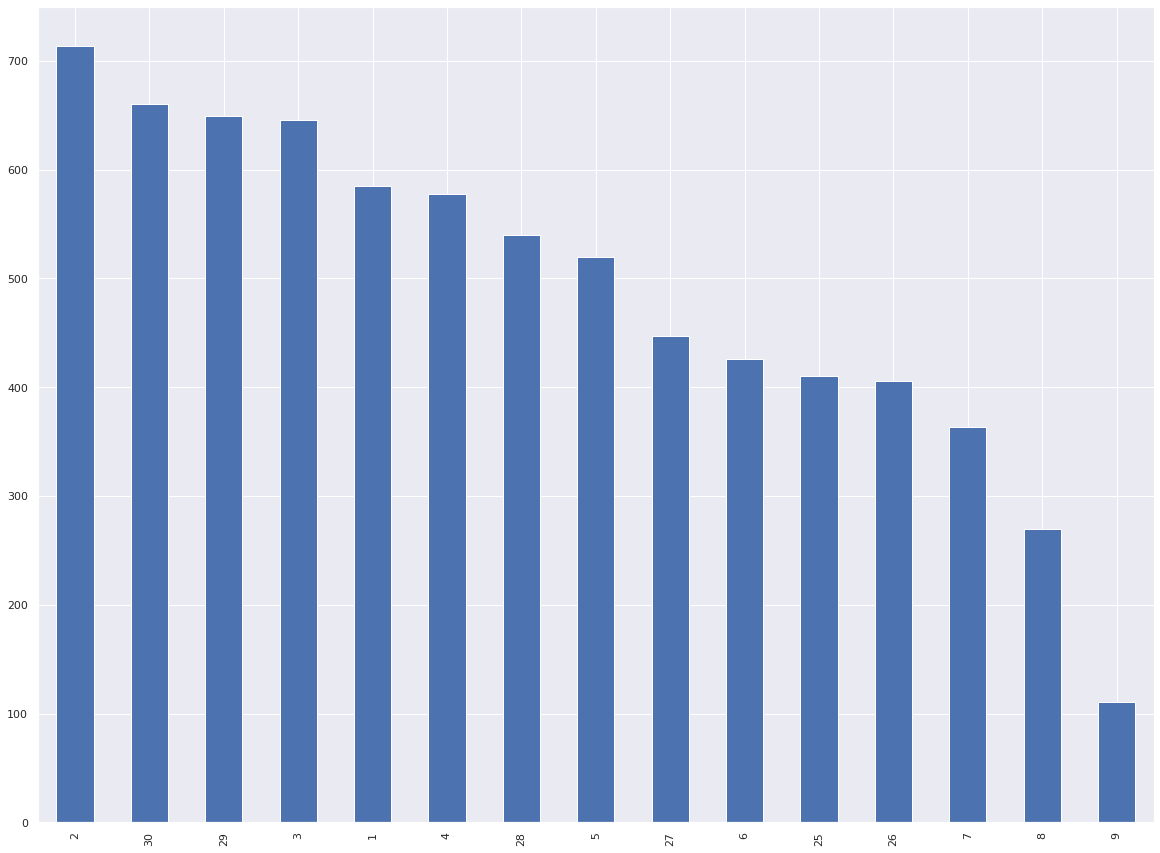

In [41]:
# how many orders and how many urgent reorders.

df['Day'].value_counts().plot(kind='bar')

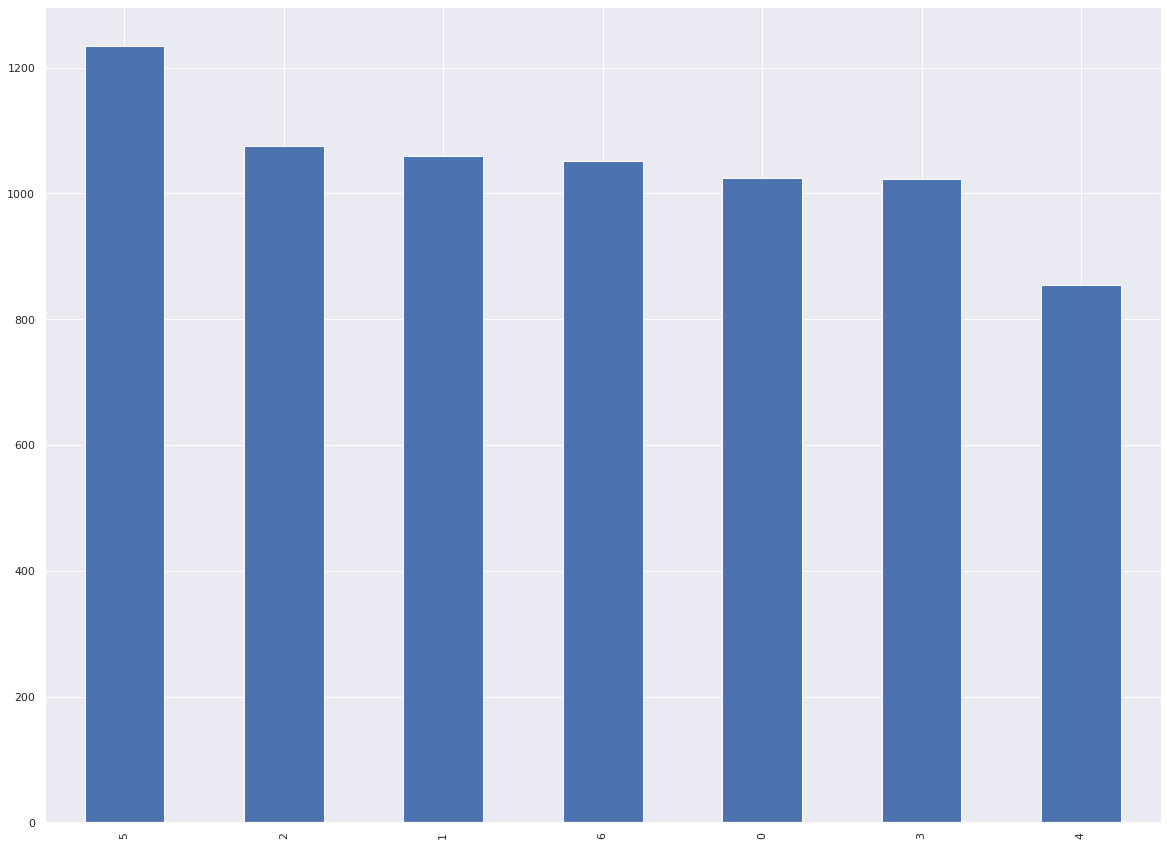

In [42]:
# how many orders and how many urgent reorders.

df['Start_weekday'].value_counts().plot(kind='bar')

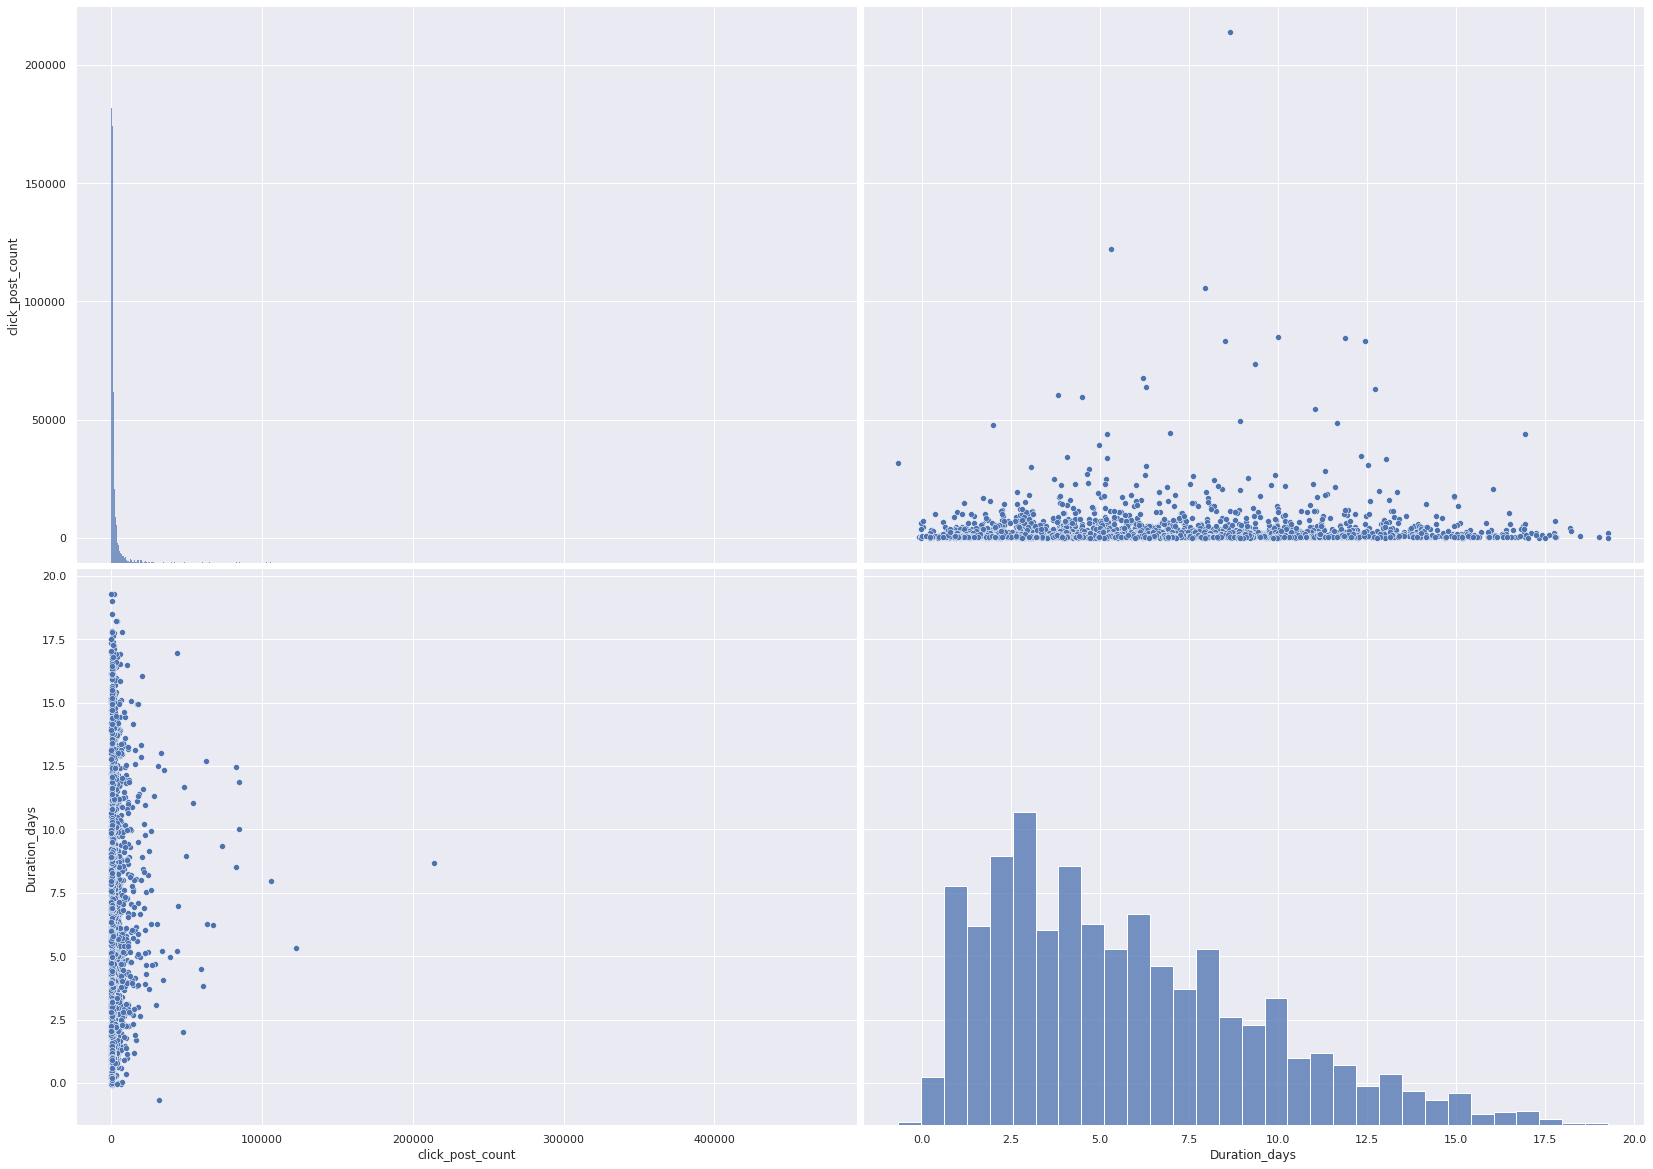

In [43]:
df1 = df[['click_post_count', 'Duration_days']]
sns.pairplot(df1, height=8.27, aspect=11.7/8.27, palette='Accent')

**Reorder Duration**

In [46]:
import pandas as pd
df = final_df
df[["reorder_time", "post_publish_time", "post_retire_time"]] = df[["reorder_time", "post_publish_time", "post_retire_time"]].apply(pd.to_datetime)
df

,index,post_id,click_time,click_post_count,tag,reorder_time,post_publish_time,post_retire_time,Day,Month,Year,Start_hour,Start_minute,Start_second,Start_weekday,Start_week_of_year,Duration,Duration_days,Duration_minutes,Duration_seconds
0,0,gXvC9ucx,5/7/2020 0:00,2031,urgent-reorder,2020-05-05 12:30:00,2020-05-04 12:53:00,2020-05-07 00:56:00,5,5,2020,12,30,0,1,19,1 days 12:26:00,2.502083,3603.0,216180.0
1,64,gXluVlHC,5/7/2020 0:00,3265,urgent-reorder,2020-05-05 02:37:00,2020-04-26 14:35:00,2020-05-13 00:10:00,5,5,2020,2,37,0,1,19,7 days 21:33:00,16.399306,23615.0,1416900.0
2,294,gXxugqam,5/7/2020 0:00,1977,reorder,2020-05-08 12:41:00,2020-05-05 11:18:00,2020-05-11 12:52:00,8,5,2020,12,41,0,4,19,3 days 00:11:00,6.065278,8734.0,524040.0
3,411,gXy6Jn2Y,5/7/2020 0:00,783,reorder,2020-05-07 13:43:00,2020-05-06 16:06:00,2020-05-08 23:17:00,7,5,2020,13,43,0,3,19,1 days 09:34:00,2.299306,3311.0,198660.0
4,468,gXo2A5D9,5/7/2020 0:00,11222,reorder,2020-05-01 05:09:00,2020-04-28 15:37:00,2020-05-09 17:23:00,1,5,2020,5,9,0,4,18,8 days 12:14:00,11.073611,15946.0,956760.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7320,1244618,gXzC9prE,5/7/2020 18:00,838,reorder,2020-05-07 16:05:00,2020-05-07 13:48:00,2020-05-07 16:28:00,7,5,2020,16,5,0,3,19,0 days 00:23:00,0.111111,160.0,9600.0
7321,1244627,gXlypm15,5/3/2020 13:00,14,reorder,2020-05-07 10:20:00,2020-04-26 19:10:00,NaT,7,5,2020,10,20,0,3,19,NaT,NaN,NaN,NaN
7322,1244639,gXkWywKl,5/1/2020 16:00,985,reorder,2020-05-01 08:24:00,2020-04-25 16:38:00,2020-05-01 11:32:00,1,5,2020,8,24,0,4,18,0 days 03:08:00,5.787500,8334.0,500040.0
7323,1244654,gXsmfEBU,5/2/2020 13:00,325,reorder,2020-05-02 11:53:00,2020-05-02 09:16:00,2020-05-02 14:28:00,2,5,2020,11,53,0,5,18,0 days 02:35:00,0.216667,312.0,18720.0


In [47]:
df['Day'] = df['reorder_time'].dt.day
# month
df['Month'] = df['reorder_time'].dt.month
# year
df['Year'] = df['reorder_time'].dt.year
# hour
df['Start_hour'] = df['reorder_time'].dt.hour
# minute
df['Start_minute'] = df['reorder_time'].dt.minute
# second
df['Start_second'] = df['reorder_time'].dt.second
# Monday is 0 and Sunday is 6
df['Start_weekday'] = df['reorder_time'].dt.weekday
# week of the year
df['Start_week_of_year'] = df['reorder_time'].dt.week
# duration
df['Duration'] = df['post_retire_time']-df['reorder_time']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  from ipykernel import kernelapp as app


In [48]:
from datetime import timedelta

df['Duration_days'] = df['Duration']/timedelta(days=1)
df['Duration_minutes'] = df['Duration']/timedelta(minutes=1)
df['Duration_seconds'] = df['Duration']/timedelta(seconds=1)
df

,index,post_id,click_time,click_post_count,tag,reorder_time,post_publish_time,post_retire_time,Day,Month,Year,Start_hour,Start_minute,Start_second,Start_weekday,Start_week_of_year,Duration,Duration_days,Duration_minutes,Duration_seconds
0,0,gXvC9ucx,5/7/2020 0:00,2031,urgent-reorder,2020-05-05 12:30:00,2020-05-04 12:53:00,2020-05-07 00:56:00,5,5,2020,12,30,0,1,19,1 days 12:26:00,1.518056,2186.0,131160.0
1,64,gXluVlHC,5/7/2020 0:00,3265,urgent-reorder,2020-05-05 02:37:00,2020-04-26 14:35:00,2020-05-13 00:10:00,5,5,2020,2,37,0,1,19,7 days 21:33:00,7.897917,11373.0,682380.0
2,294,gXxugqam,5/7/2020 0:00,1977,reorder,2020-05-08 12:41:00,2020-05-05 11:18:00,2020-05-11 12:52:00,8,5,2020,12,41,0,4,19,3 days 00:11:00,3.007639,4331.0,259860.0
3,411,gXy6Jn2Y,5/7/2020 0:00,783,reorder,2020-05-07 13:43:00,2020-05-06 16:06:00,2020-05-08 23:17:00,7,5,2020,13,43,0,3,19,1 days 09:34:00,1.398611,2014.0,120840.0
4,468,gXo2A5D9,5/7/2020 0:00,11222,reorder,2020-05-01 05:09:00,2020-04-28 15:37:00,2020-05-09 17:23:00,1,5,2020,5,9,0,4,18,8 days 12:14:00,8.509722,12254.0,735240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7320,1244618,gXzC9prE,5/7/2020 18:00,838,reorder,2020-05-07 16:05:00,2020-05-07 13:48:00,2020-05-07 16:28:00,7,5,2020,16,5,0,3,19,0 days 00:23:00,0.015972,23.0,1380.0
7321,1244627,gXlypm15,5/3/2020 13:00,14,reorder,2020-05-07 10:20:00,2020-04-26 19:10:00,NaT,7,5,2020,10,20,0,3,19,NaT,NaN,NaN,NaN
7322,1244639,gXkWywKl,5/1/2020 16:00,985,reorder,2020-05-01 08:24:00,2020-04-25 16:38:00,2020-05-01 11:32:00,1,5,2020,8,24,0,4,18,0 days 03:08:00,0.130556,188.0,11280.0
7323,1244654,gXsmfEBU,5/2/2020 13:00,325,reorder,2020-05-02 11:53:00,2020-05-02 09:16:00,2020-05-02 14:28:00,2,5,2020,11,53,0,5,18,0 days 02:35:00,0.107639,155.0,9300.0


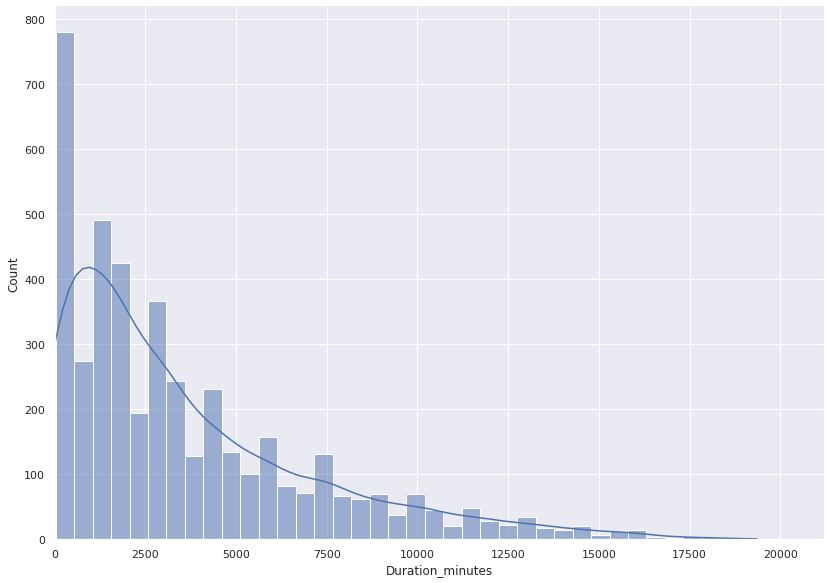

In [49]:
from matplotlib import pyplot as plt
import seaborn as sns
df.dropna()
sns.displot(df['Duration_minutes'], kde=True,  height=8.27, aspect=11.7/8.27).set(xlim=(0)) 

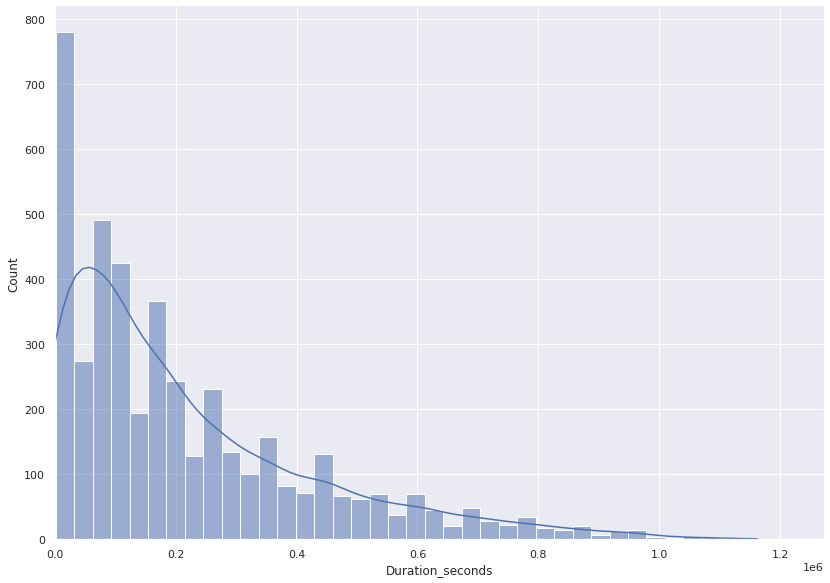

In [50]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.displot(df['Duration_seconds'], kde=True, height=8.27, aspect=11.7/8.27).set(xlim=(0)) 

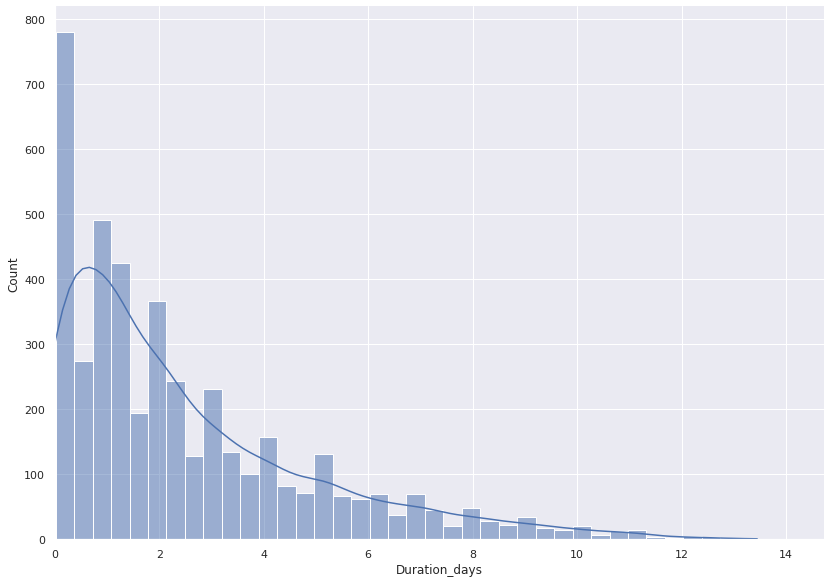

In [51]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.displot(df['Duration_days'], kde=True,  height=8.27, aspect=11.7/8.27).set(xlim=(0)) 

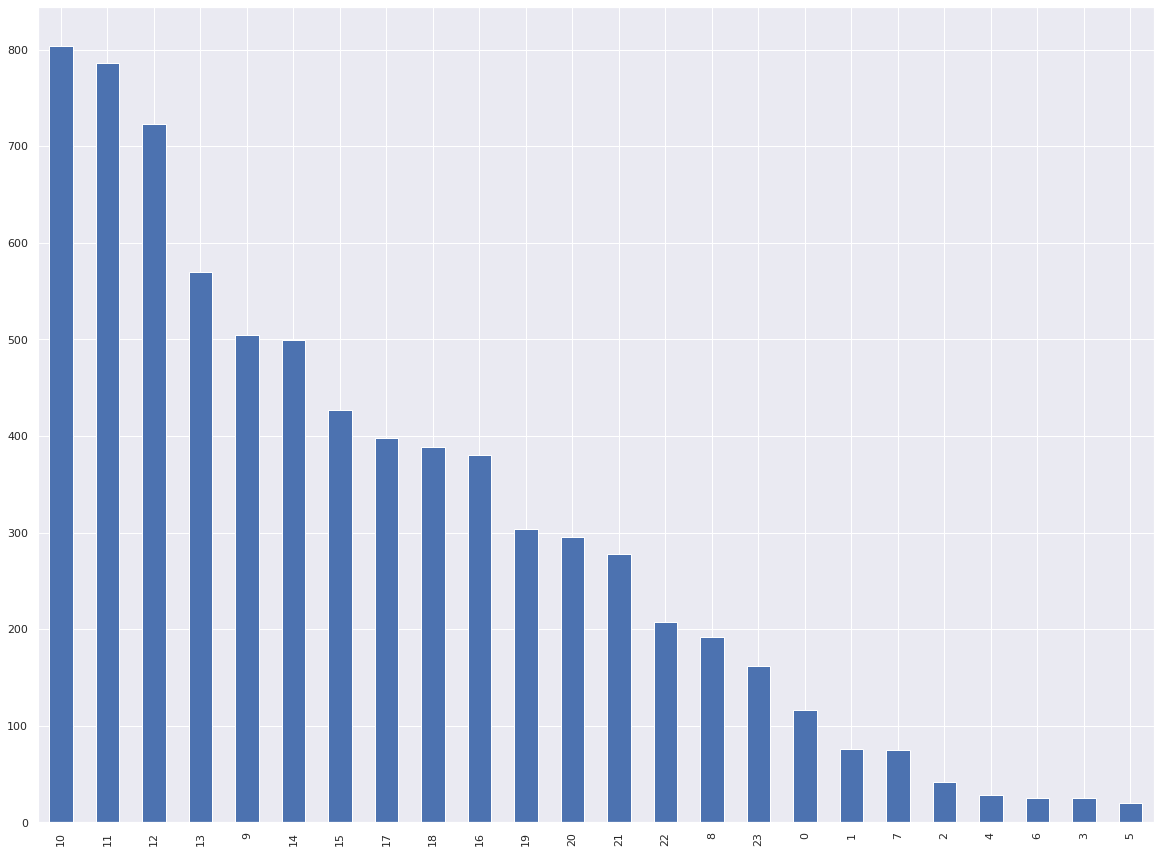

In [52]:
# how many orders and how many urgent reorders.

df['Start_hour'].value_counts().plot(kind='bar')

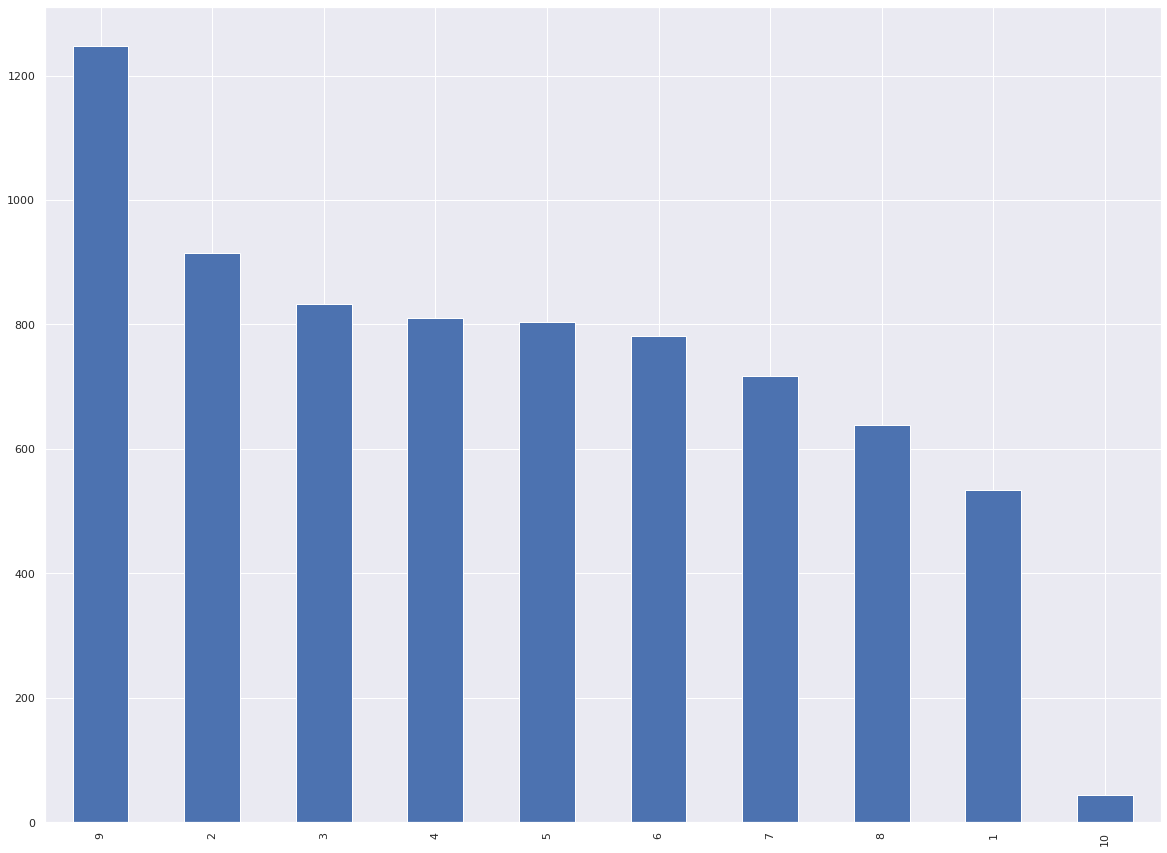

In [53]:
# how many orders and how many urgent reorders.

df['Day'].value_counts().plot(kind='bar')

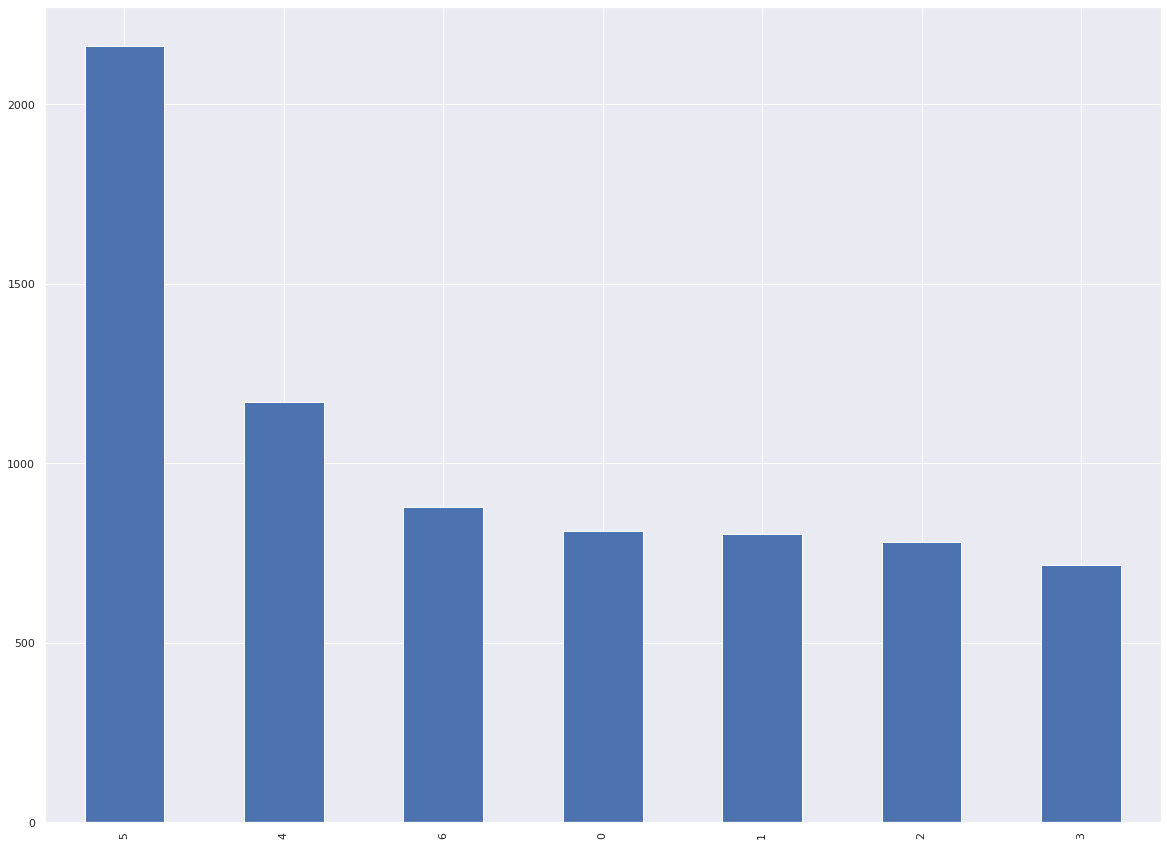

In [54]:
# how many orders and how many urgent reorders.

df['Start_weekday'].value_counts().plot(kind='bar')

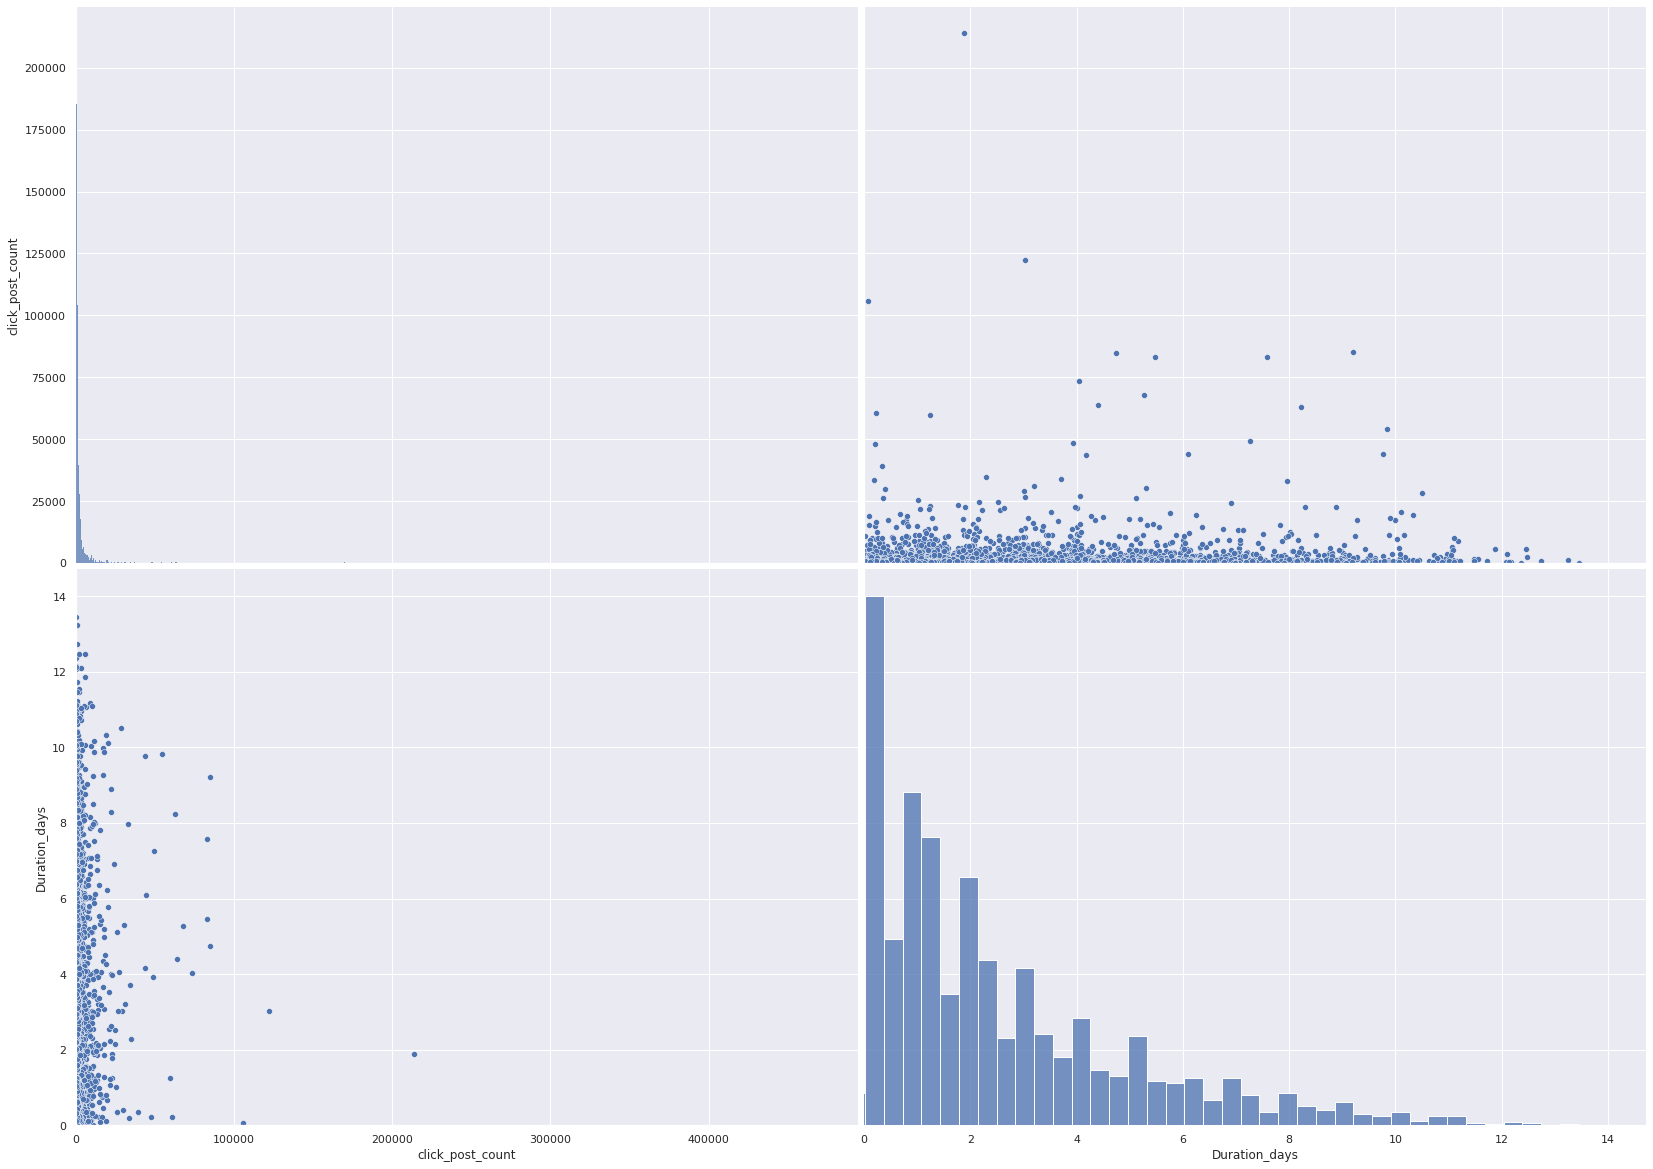

In [55]:
df1 = df[['click_post_count', 'Duration_days']]
sns.pairplot(df1, height=8.27, aspect=11.7/8.27, palette='Accent').set(ylim=(0), xlim=(0)) 

**Top 10 Posts**

In [58]:
temp = df.sort_values('click_post_count').tail(10)
temp

,index,post_id,click_time,click_post_count,tag,reorder_time,post_publish_time,post_retire_time,Day,Month,Year,Start_hour,Start_minute,Start_second,Start_weekday,Start_week_of_year,Duration,Duration_days,Duration_minutes,Duration_seconds
2403,558543,gXrmu463,5/3/2020 8:00,83070,urgent-reorder,2020-05-02 12:40:00,2020-05-01 14:09:00,2020-05-10 02:27:00,2,5,2020,12,40,0,5,18,7 days 13:47:00,7.574306,10907.0,654420.0
534,135441,gXpqWk9s,5/8/2020 15:00,84680,reorder,2020-05-06 19:52:00,2020-04-29 16:33:00,2020-05-11 13:32:00,6,5,2020,19,52,0,2,19,4 days 17:40:00,4.736111,6820.0,409200.0
613,153241,gXsOVRzx,5/5/2020 15:00,85104,reorder,2020-05-02 16:31:00,2020-05-01 21:37:00,2020-05-11 21:28:00,2,5,2020,16,31,0,5,18,9 days 04:57:00,9.206250,13257.0,795420.0
1003,260575,gXs6fVC-,5/7/2020 12:00,103125,reorder,2020-05-04 10:41:00,2020-05-02 10:05:00,NaT,4,5,2020,10,41,0,0,19,NaT,NaN,NaN,NaN
2949,676509,gXpy2cnG,5/5/2020 21:00,105744,reorder,2020-05-07 13:50:00,2020-04-29 16:40:00,2020-05-07 15:29:00,7,5,2020,13,50,0,3,19,0 days 01:39:00,0.068750,99.0,5940.0
1220,303071,gXvGd16j,5/9/2020 2:00,122320,reorder,2020-05-06 19:48:00,2020-05-04 13:07:00,2020-05-09 20:27:00,6,5,2020,19,48,0,2,19,3 days 00:39:00,3.027083,4359.0,261540.0
2732,624092,gXsG6W1H,5/7/2020 13:00,169800,urgent-reorder,2020-05-02 09:09:00,2020-05-02 02:58:00,NaT,2,5,2020,9,9,0,5,18,NaT,NaN,NaN,NaN
439,107063,gXoS2cJW,5/2/2020 1:00,213928,reorder,2020-05-05 16:19:00,2020-04-28 21:45:00,2020-05-07 13:38:00,5,5,2020,16,19,0,1,19,1 days 21:19:00,1.888194,2719.0,163140.0
651,164438,gXpGh4Rz,5/2/2020 13:00,215319,reorder,2020-05-07 16:31:00,2020-04-29 10:09:00,NaT,7,5,2020,16,31,0,3,19,NaT,NaN,NaN,NaN
2775,633376,gXt2ml5B,5/4/2020 22:00,470862,reorder,2020-05-07 16:19:00,2020-05-02 17:32:00,NaT,7,5,2020,16,19,0,3,19,NaT,NaN,NaN,NaN


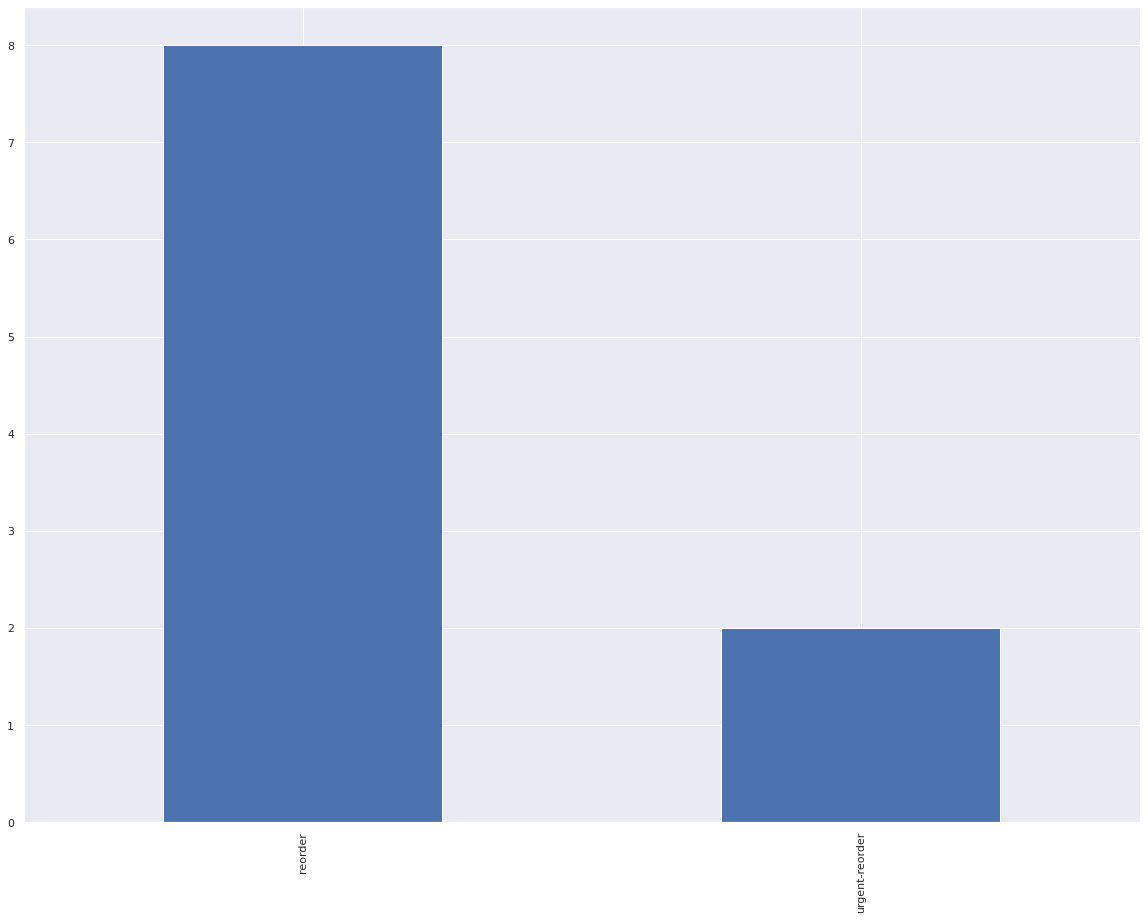

In [59]:
temp['tag'].value_counts().plot(kind='bar')

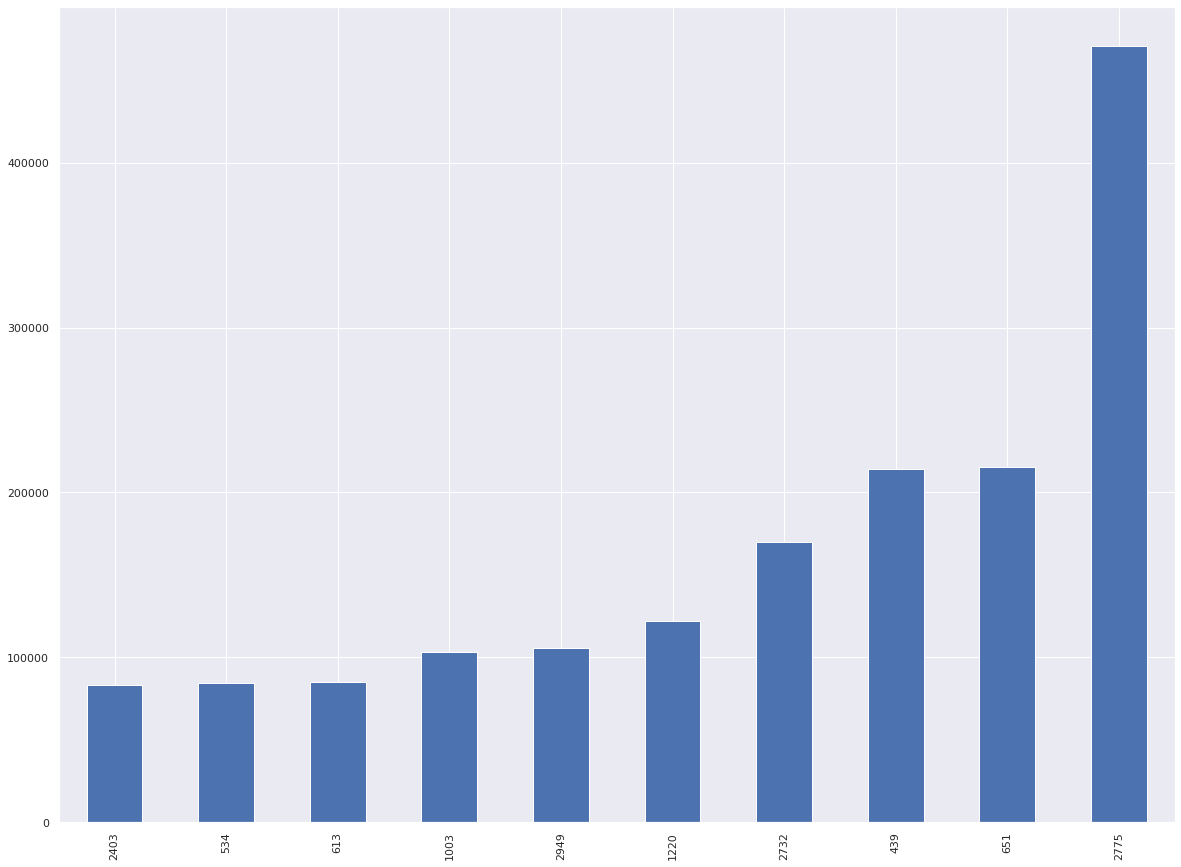

In [60]:
temp['click_post_count'].plot(kind='bar')